# Table of Contents
 <p><div class="lev2"><a href="#Compute-scalings"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Compute scalings</a></div><div class="lev2"><a href="#Compute-statistics"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Compute statistics</a></div><div class="lev1"><a href="#Show-some-figures"><span class="toc-item-num">1&nbsp;&nbsp;</span>Show some figures</a></div><div class="lev2"><a href="#Plot-maps-of-predictor-variables"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot maps of predictor variables</a></div>

In [2]:
%load_ext autoreload
%matplotlib inline

In [3]:
%autoreload 2

import numpy as np
import numpy.ma as ma
import dask.array as da
import matplotlib.pyplot as plt
import datetime as dt
import sys,os,glob
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])
## Load own libraries
from environmentAndDirectories import *
from importingData import *
from scalingApproximations import *
from slicingAndSubsetting import *
from plotMaps import *
from plot1DInvLog import *
from statisticalDistributions import *

Own modules available: ['CAMsettings', 'daskOptions', 'environmentAndDirectories', 'importingData', 'physicalConstants', 'plot1DInvLog', 'plotMaps', 'scalingApproximations', 'slicingAndSubsetting', 'statisticalDistributions', 'thermoConstants', 'thermoFunctions']


In [4]:
print("define global variables and datasets")
## Define percentile values
Q_IL_ext = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987])
Q_IL_ext_colorbar = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987,99.999])
Qs = [90.,96.8377,99.,99.6838,99.9,99.9684,99.99,99.9968]
Q_ids = ['90.0','96.8377','99.0','99.6838','99.9','99.9684','99.99','99.9968']

define global variables and datasets


In [5]:
compset = 'FAMIPC5'
experiment = 'piControl'
subset = 'tropics'
time_stride = 'day'

historyFilesSettings = getCAMHistoryFilesSettings()

inputdir, inputdir_processed_day, inputdir_processed_1hr, inputdir_results, inputdir_fx = \
    getInputDirectories(compset,experiment)

daskarray = True
    
q_id = 'Q'
spechum = getValues(q_id,compset,subset,experiment,time_stride,daskarray=daskarray)
omega_id = 'OMEGA'
omega = getValues(omega_id,compset,subset,experiment,time_stride,daskarray=daskarray)
pr_id = 'PRECT'
pr = getValues(pr_id,compset,subset,experiment,time_stride,daskarray=daskarray)
ts_id = 'TS'
ts = getValues(ts_id,compset,subset,experiment,time_stride,daskarray=daskarray)
relhum_id = 'RELHUM'
relhum = getValues(relhum_id,compset,subset,experiment,time_stride,daskarray=daskarray)


Q found in history files
Importing Q from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc
OMEGA found in history files
Importing OMEGA from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc
PRECT found in history files
Importing PRECT from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc
TS found in history files
Importing TS from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  

In [6]:
## Get longitude, latitude and landmask

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)

print("Loading lontigude, latitude and landmask")

landmask = fh.variables['landmask']


Loading lontigude, latitude and landmask


In [7]:
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)

In [8]:
ps_varid = 'PS'
ps = getValues(ps_varid,compset,subset,experiment,time_stride,daskarray=daskarray)
pres = computeP(ps)
cn = getArrayType(pres)

PS found in history files
Importing PS from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc


## Compute scalings

In [9]:
print("compute 2D surfaces of predictor variables")
p_500 = 500; levdim=1
p_925 = 925
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)
omega_850 = isobaricSurface(omega,pres,p_ref=850,levdim=levdim)
spechum_925 = isobaricSurface(spechum,pres,p_ref=p_925,levdim=levdim)
relhum_925 = isobaricSurface(relhum,pres,p_ref=p_925,levdim=levdim)
relhum_850 = isobaricSurface(relhum,pres,p_ref=850,levdim=levdim)
relhum_500 = isobaricSurface(relhum,pres,p_ref=p_500,levdim=levdim)
relhum_300 = isobaricSurface(relhum,pres,p_ref=300,levdim=levdim)


compute 2D surfaces of predictor variables


In [19]:
print("compute two scalings")
pr_sc1 = singleLevelScalingFromOmegaQ(spechum_925,-omega_500)

n_pts = pr.size
Q_IL = getInvLogRanks(n_pts,fill_last_decade=True)
i_Q = indexOfQ(99.9,Q_IL)
ranks, centers, breaks = computePercentilesAndBinsFromRanks(pr.flatten(),Q_IL)

from scipy.optimize import leastsq

def computeScaling2AtQ(i_Q,Q_IL,omega,temp,pres,pr,efficiency=1):

    omega_Q = meanXAtYPercentiles(i_Q,Q_IL,omega,pr)
    temp_Q = meanXAtYPercentiles(i_Q,Q_IL,temp,pr)
    pres_Q = meanXAtYPercentiles(i_Q,Q_IL,pres,pr)
    pr_Q = meanXAtYPercentiles(i_Q,Q_IL,pr,pr)

    return singleLevelScalingFromOmegaT(-omega_Q,temp_Q,pres_Q,efficiency=efficiency)

def computeEfficiency(pr_sc,pr):
    
    guess = pr[0]/pr_sc[0]
    return leastsq(lambda x:pr-x*pr_sc,guess)[0][0]
    
pr_sc2_zeroeff = np.array(list(map(lambda i:computeScaling2AtQ(i,Q_IL,omega_500,ts,ps,pr),range(i_Q-5,i_Q+6))))
pr_ref = centers[i_Q-5:i_Q+6]
eps_1 = computeEfficiency(pr_sc2_zeroeff,pr_ref)
pr_sc2 = singleLevelScalingFromOmegaT(-omega_500,ts,ps,efficiency=eps_1)

compute two scalings


## Compute statistics

In [14]:
# Get mean of scaling in pr bins
pr_sc2_at_pr_Q = np.array(list(map(lambda x: meanXAtYPercentiles(x,Q_IL,pr_sc2,pr),ranks)))

/Users/bfildier/anaconda/envs/py36/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [25]:
# Get interquartile range
ranks_IQR = (25,75)
pr_sc2_IQR = np.vstack(list(map(lambda x: XPercentilesAtYPercentiles(x,Q_IL,pr_sc2,pr,ranks_IQR),ranks)))

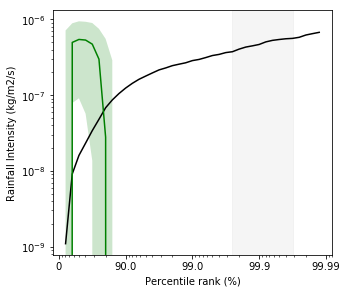

In [26]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

# Grey shading 
i_Q_lims = (i_Q-5,i_Q+4)
subplotXShadingLogRanksILog(ax,Q_IL,i_Q_lims,alpha=0.15,transformX=False)
# Interquartile range for pointwise scaling 2
subplotYShadingLogRanksILog(ax,Q_IL,[pr_sc2_IQR[:,0],pr_sc2_IQR[:,1]],col='green',transformX=False)
# Mean of pointwise scaling 2
subplotLogRanksILog(ax,Q_IL,[centers,pr_sc2_at_pr_Q],col=['k','green'],transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall Intensity (kg/m2/s)')

plt.show()

# Show some figures

## Plot maps of predictor variables

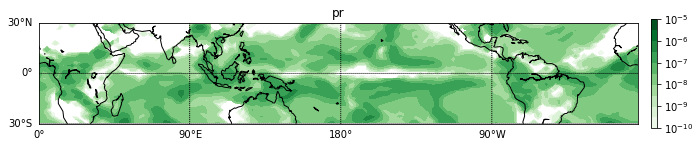

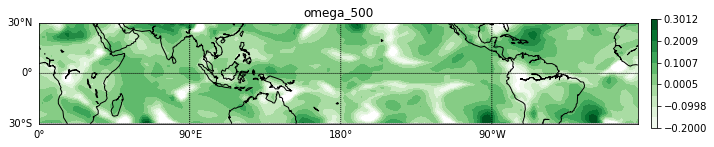

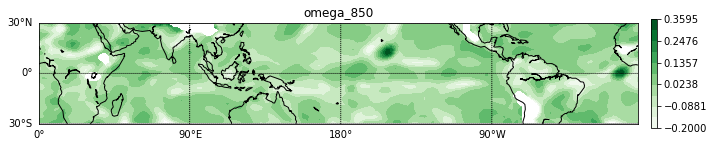

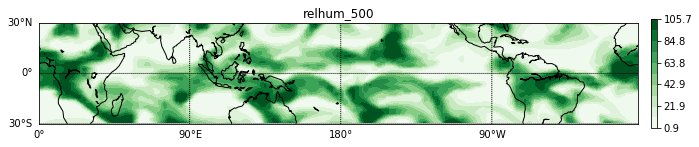

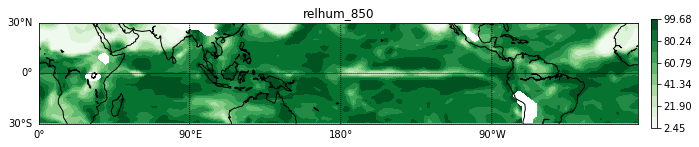

/Users/bfildier/anaconda/envs/py36/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)


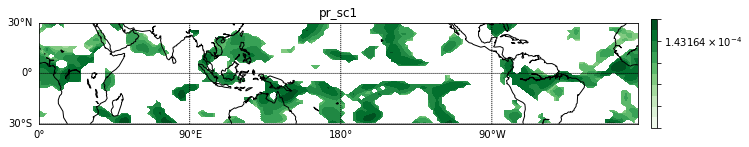

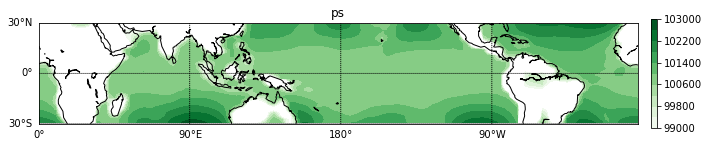

In [21]:
## Plot

vars2plot = ['pr','omega_500','omega_850','relhum_500','relhum_850','pr_sc1','ps']
v_lims ={'pr':[1e-10,1e-5],
         'omega_500':[-0.2,None],
         'omega_850':[-0.2,None],
         'relhum_500':[None,None],
         'relhum_850':[None,None],
         'pr_sc1':[None,None],
         'ps':[99000,103000]}
mode = {'pr':'log','omega_500':None,'omega_850':None,'relhum_500':None,'relhum_850':None,'pr_sc1':'log','ps':None}

for var in vars2plot:
    
    v = getattr(thismodule,var)[0,...]
    plotMapTropics(lon2D,lat2D,v,v_min=v_lims[var][0],v_max=v_lims[var][1],mode=mode[var],title=var)
    plt.show()